In [15]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimage 
import numpy as np 
from math import log 
import cv2 
from os import listdir, path 
import random 
import math 

In [16]:
def readImages(imgDirectory): 
    fileNames = [f for f in listdir(imgDirectory) if path.isfile(path.join(imgDirectory, f))] 
    images = np.array([mpimage.imread(path.join(imgDirectory, file)) for file in fileNames]) 
    N_images, height, width = images.shape 
    return N_images, height, width, images    

In [17]:
imgDirectory = r'C:\Users\acer\Desktop\PC\yale_faces'
N, height, width, trainImages = readImages(path.join(imgDirectory, 'train'))
train_labels = listdir(path.join(imgDirectory, 'train'))
train_labels = [i.split('.')[0] for i in train_labels]

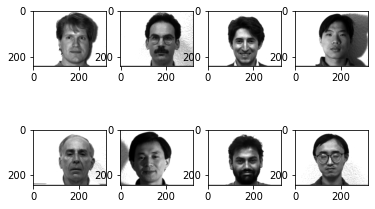

In [18]:
k=0
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(trainImages[k],cmap='gray')
    k+=11
plt.show()

In [19]:
lookup_names = {}
for i in set(train_labels):
    lookup_names[int(i[7:])-1] = i
print(lookup_names)
trainImageVectors = trainImages.reshape(N, height * width) 

{1: 'subject02', 3: 'subject04', 6: 'subject07', 7: 'subject08', 9: 'subject10', 8: 'subject09', 11: 'subject12', 14: 'subject15', 10: 'subject11', 4: 'subject05', 5: 'subject06', 13: 'subject14', 2: 'subject03', 0: 'subject01', 12: 'subject13'}


In [20]:
avgFace, eigenVectors_pca = cv2.PCACompute(trainImageVectors, mean=None, maxComponents=135) 
avgFace = avgFace.squeeze() 

In [21]:
trainVectorsNormalized = trainImageVectors - avgFace 
train_weights = np.dot(trainVectorsNormalized, eigenVectors_pca.T)
train_weights.shape

(150, 135)

In [22]:
def lda (X , y , num_components =0) :
    y = np.asarray(y)
    [n , d] = X.shape
    c = np.unique( y)
    if ( num_components <= 0) or ( num_components >( len(c) -1) ):
        num_components = ( len(c) -1)
    meanTotal = X.mean( axis =0)
    print(1)
    Sw = np.zeros((d,d) , dtype = np.float32 )
    Sb = np.zeros((d,d) , dtype = np.float32 )
    print(2)
    for i in c:
        Xi = X[ np.where (y == i) [0] ,:]
        meanClass = Xi.mean( axis =0)
        Sw = Sw + np.dot(( Xi - meanClass ).T , ( Xi - meanClass ))
        Sb = Sb + n*np.dot(( meanClass - meanTotal ).T , ( meanClass - meanTotal ))
    eigenvalues , eigenvectors = np.linalg.eig( np.linalg.inv( Sw )* Sb )
    idx = np.argsort ( - eigenvalues.real )
    eigenvalues , eigenvectors = eigenvalues [ idx ] , eigenvectors [: , idx ]
    eigenvalues = np.array( eigenvalues [0: num_components ].real , dtype = np.float32 , copy =True )
    eigenvectors = np.array( eigenvectors [0: ,0: num_components ].real , dtype = np.float32 ,copy = True )
    return [ eigenvalues , eigenvectors ]


In [23]:
num_co=2
[eigenvalues_lda , eigenvectors_lda] = lda ( train_weights, train_labels ,num_co )
print(eigenvectors_lda.shape)
print(type(eigenvectors_lda))
eigenvectors = np.dot(eigenVectors_pca.T,eigenvectors_lda)
#print(eigenvectors.T.shape)
print(eigenvectors.T.reshape(num_co,height,width).shape)
#print(eigenvectors.shape)
print(train_weights.shape)

1
2
(135, 2)
<class 'numpy.ndarray'>
(2, 243, 320)
(150, 135)


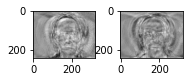

In [24]:
k=0
for i in range(num_co):
    plt.subplot(4,4,i+1)
    plt.imshow(eigenvectors.T.reshape(num_co,height,width)[k],cmap='gray')
    k+=1
plt.show()

In [25]:
Weights=np.dot(trainVectorsNormalized,eigenvectors)

In [26]:
eigenvectors.shape
trainImageVectors.shape
Weights.shape

(150, 2)

In [27]:
N, height, width, testImages = readImages(path.join(imgDirectory, 'test'))
testImages_names = listdir(path.join(imgDirectory, 'test'))
testImages_labels = []
for i in range(len(testImages_names)):
    testImages_names[i] = testImages_names[i].split('.')[0]
    testImages_labels.append(int(testImages_names[i][7:])-1)
testImageVectors = testImages.reshape(N, height * width) 

subject01
subject04


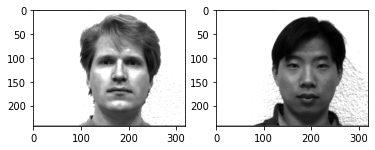

subject02
subject02


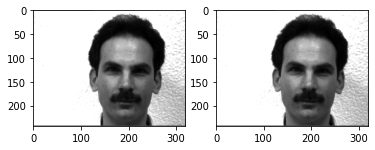

subject03
subject03


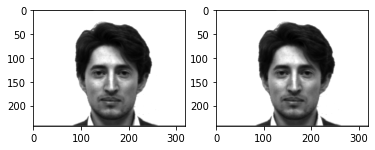

subject04
subject04


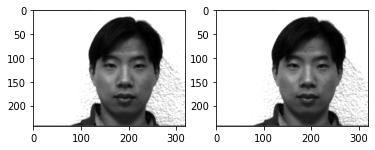

subject05
subject05


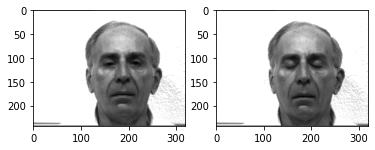

subject06
subject06


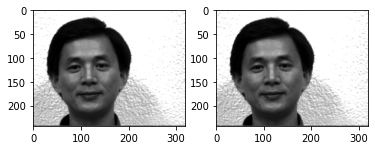

subject07
subject07


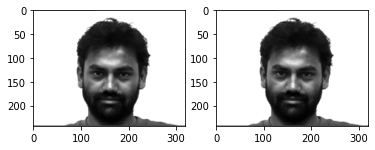

subject08
subject08


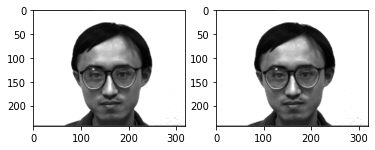

subject09
subject09


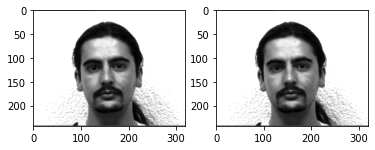

subject10
subject10


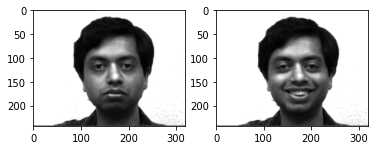

subject11
subject11


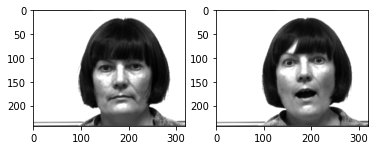

subject12
subject12


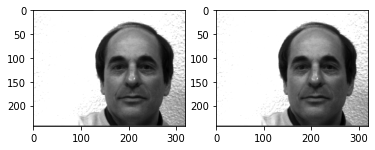

subject13
subject13


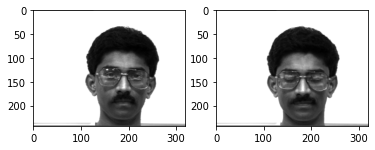

subject14
subject14


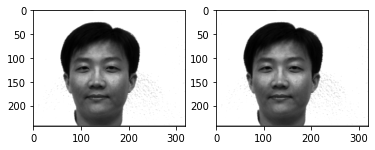

subject15
subject07


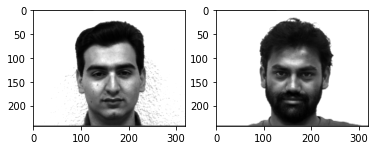

Accuracy score =86.66666666666667%


In [28]:
predicted=[]
correct_pred=0
for INDEX in range(15):

    aNormalizedTestVector = testImageVectors[INDEX] - avgFace
    testWeights = np.dot(aNormalizedTestVector, eigenvectors) 
    plt.subplot(1,2,1)
    plt.imshow(testImages[  INDEX] ,cmap='gray')
    mini=math.inf
    for i in range(150): 
        dist=np.linalg.norm(testWeights-Weights[i])
        if dist<mini:
            mini=dist
            midx=i+1
    predicted.append(midx)
    print(testImages_names[INDEX])
    print(train_labels[midx-1])
    if testImages_names[INDEX]==train_labels[midx-1]:
        correct_pred+=1
    plt.subplot(1,2,2)
    plt.imshow(trainImages[midx-1],cmap='gray')
    plt.show()
print(f'Accuracy score ={(correct_pred/15)*100}%')